In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# parquet 파일 데이터를 읽어온다.

In [3]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [4]:
# parquet 파일 데이터를 읽어온다.
# df1 = pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
# df1

#### 분석 전 주의사항

- 하나의 파일에서 작업을 다 하려고 하지 마세요
- 데이터를 읽어온 다음 데이터를 가공했다면 가공한 데이터를 파일로 저장하고 새로운 ipynb 파일을 만들어서 저장한 데이터를 읽어와서 작업하는 형태로 해주세요

### 데이터 불러오기

In [8]:
#201807~201812 마케팅 정보 train 데이터 병합
df1 = pd.read_parquet('open/train/7.마케팅정보/201807_train_마케팅정보.parquet')
df2 = pd.read_parquet('open/train/7.마케팅정보/201808_train_마케팅정보.parquet')
df3 = pd.read_parquet('open/train/7.마케팅정보/201809_train_마케팅정보.parquet')
df4 = pd.read_parquet('open/train/7.마케팅정보/201810_train_마케팅정보.parquet')
df5 = pd.read_parquet('open/train/7.마케팅정보/201811_train_마케팅정보.parquet')
df6 = pd.read_parquet('open/train/7.마케팅정보/201812_train_마케팅정보.parquet')

In [9]:
marketing_merged = pd.concat([df1,df2,df3,df4,df5,df6])
marketing_merged.to_parquet('open/train/7.마케팅정보//marketing_merged.parquet')

In [10]:
df = marketing_merged

### 세그먼트 컬럼 추가하기

In [12]:
#회원정보 데이터 불러오기
df1 = pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
df2 = pd.read_parquet('open/train/1.회원정보/201808_train_회원정보.parquet')
df3 = pd.read_parquet('open/train/1.회원정보/201809_train_회원정보.parquet')
df4 = pd.read_parquet('open/train/1.회원정보/201810_train_회원정보.parquet')
df5 = pd.read_parquet('open/train/1.회원정보/201811_train_회원정보.parquet')
df6 = pd.read_parquet('open/train/1.회원정보/201812_train_회원정보.parquet')

In [13]:
#회원정보 데이터 병합하기 
new_data = pd.concat([df1,df2,df3,df4,df5,df6])

In [14]:
#병합한 데이터 저장
new_data.to_parquet('open/train/1.회원정보/merged_data.parquet')

In [15]:
#기존 데이터프레임에 Segment 컬럼 추가하기
#추가하기 전 두 데이터프레임 행의 개수가 일치하는지 확인하기
len(df)

2400000

In [16]:
len(new_data)

2400000

In [17]:
df['Segment'] = new_data['Segment'].values

In [18]:
df

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,Segment
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15회 이상,10일 이상,E
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
399996,201812,TRAIN_399996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20회 이상,15일 이상,D
399997,201812,TRAIN_399997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E


### EDA

In [20]:
df.columns

Index(['기준년월', 'ID', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M',
       '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M',
       '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M',
       '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M',
       '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M',
       '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M',
       '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M',
       '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M',
       '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M',
       '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M',
       '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M',
       '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M',
       '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M',
       '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M',
       '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M

In [21]:
df.describe()

,기준년월,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_카드론_LMS_B0M,...,컨택건수_리볼빙_인터넷_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_카드론_당사앱_R6M,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M
count,2.400000e+06,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2.400000e+06,...,2400000.0,2.400000e+06,2400000.0,2400000.0,2400000.0,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2400000.0
mean,2.018095e+05,1.657625e-01,6.666667e-06,0.0,7.920292e-02,2.500000e-06,4.166667e-07,0.0,1.316500e-02,4.089167e-03,...,0.0,2.359363e+00,0.0,0.0,0.0,7.004167e-04,2.744625e-02,0.0,4.281692e-01,0.0
std,1.707825e+00,6.976548e-01,3.162271e-03,0.0,4.768350e-01,1.581137e-03,6.454972e-04,0.0,1.139811e-01,6.381573e-02,...,0.0,2.087587e+00,0.0,0.0,0.0,4.600645e-02,3.823193e-01,0.0,2.160925e+00,0.0
min,2.018070e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
25%,2.018080e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
50%,2.018095e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,2.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
75%,2.018110e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,4.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
max,2.018120e+05,4.000000e+00,2.000000e+00,0.0,3.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,...,0.0,9.000000e+00,0.0,0.0,0.0,4.000000e+00,8.000000e+00,0.0,3.900000e+01,0.0


In [22]:
#결측치 확인
df.isnull().sum()

기준년월               0
ID                 0
컨택건수_카드론_TM_B0M    0
컨택건수_리볼빙_TM_B0M    0
컨택건수_CA_TM_B0M     0
                  ..
컨택건수_채권_R6M        0
컨택건수_FDS_R6M       0
캠페인접촉건수_R12M       0
캠페인접촉일수_R12M       0
Segment            0
Length: 65, dtype: int64

In [23]:
#Segment 분포 확인
df['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

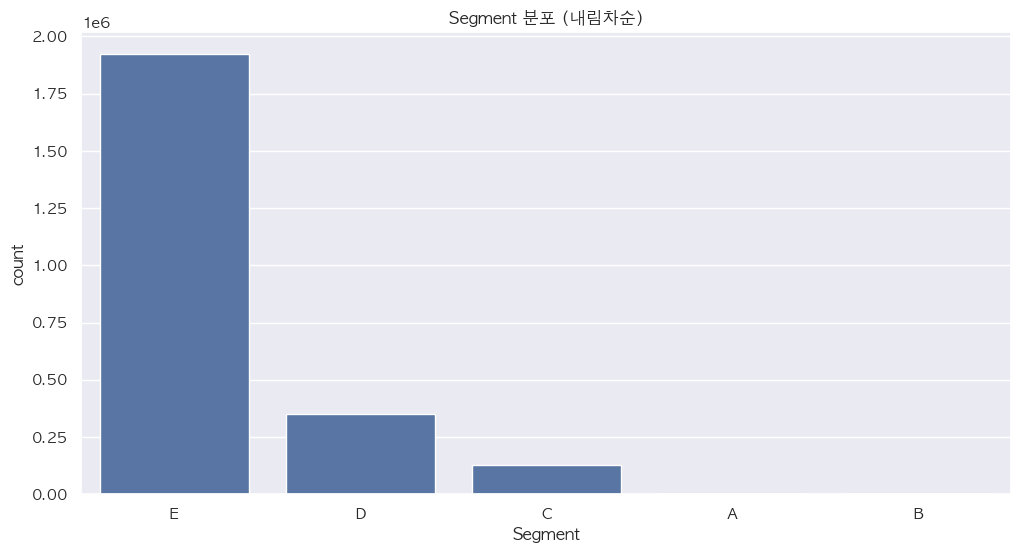

In [24]:
# 1. 내림차순 정렬된 Segment 순서 추출
order = df['Segment'].value_counts().sort_values(ascending=False).index

# 2. countplot에서 order=로 순서 지정
sns.countplot(data=df, x='Segment', order=order)
plt.title('Segment 분포 (내림차순)')
plt.show()

In [25]:
df['Segment'].value_counts(normalize=True)

Segment
E    0.800855
D    0.145517
C    0.053163
A    0.000405
B    0.000060
Name: proportion, dtype: float64

- Segment 수 E > D > C 
- E가 압도적으로 많음
- 클래스 간 불균형이 심함

## TM(=텔레 마케팅) 

In [28]:
#TM(=Tele Marketing), 전화, 팩스 등을 이용하여 상품이나 서비스를 홍보하거나 판매하는 마케팅 활동

In [29]:
#컬럼명에 'TM'이 들어가있는 것만 추출
tm_cols = [col for col in df.columns if '_TM_' in col]

In [30]:
df_tm = df[df['Segment'].isin(['A','B','C', 'D', 'E'])] 
segment_tm_mean = df_tm.groupby('Segment')[tm_cols].mean().T

# TM 채널 관련 변수들 중 상위 5개 변수만 보기
segment_tm_mean.sort_values(by='E', ascending=False).head(5)

Segment,A,B,C,D,E
컨택건수_카드론_TM_R6M,1.226337,1.583333,1.505040,1.748120,1.874827
컨택건수_이용유도_TM_R6M,0.203704,0.541667,0.399545,0.581748,1.291629
컨택건수_보험_TM_R6M,0.431070,0.645833,0.435199,0.447870,0.516140
컨택건수_카드론_TM_B0M,0.066872,0.125000,0.139925,0.168903,0.166960
컨택건수_이용유도_TM_B0M,0.000000,0.000000,0.003660,0.009733,0.096887


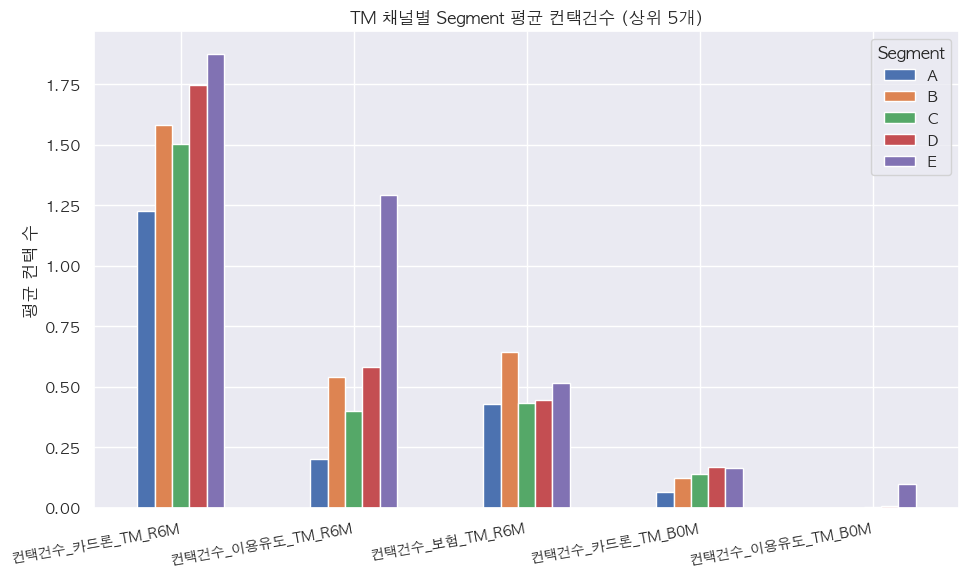

In [31]:
import matplotlib.pyplot as plt

# 상위 5개 변수
top_vars = segment_tm_mean.sort_values(by='E', ascending=False).head(5)

top_vars.plot(kind='bar', figsize=(10, 6))
plt.title('TM 채널별 Segment 평균 컨택건수 (상위 5개)')
plt.ylabel('평균 컨택 수')
plt.xticks(rotation=10, ha='right', fontsize=10) #x축을 조금 오른쪽으로 배치하고 싶은데 잘 모르겠다 
plt.tight_layout()
plt.show()


- Segment E는 카드론, 이용유도에서 타 고객들보다 컨택 건수가 높음
- `컨택건수_이용유도_TM_R6M`은 E가 압도적으로 높음
- `컨택건수_보험_TM_R6M`은 B > E

## LMS(=Long Message Service), 장문 문자 서비스 

In [34]:
#컬럼명에 'LMS'이 들어가있는 것만 추출
lms_cols = [col for col in df.columns if '_LMS_' in col]

In [35]:
df_lms = df[df['Segment'].isin(['A','B','C', 'D', 'E'])] 
segment_lms_mean = df_lms.groupby('Segment')[lms_cols].mean().T

# TM 채널 관련 변수들 중 상위 5개 변수만 보기
segment_lms_mean.sort_values(by='E', ascending=False).head(5)

Segment,A,B,C,D,E
컨택건수_이용유도_LMS_R6M,3.848765,5.715278,3.709507,3.662689,3.488987
컨택건수_이용유도_LMS_B0M,0.886831,1.291667,0.749259,0.728627,0.631678
컨택건수_CA_LMS_R6M,0.240741,0.222222,0.219962,0.277249,0.282035
컨택건수_카드론_LMS_R6M,0.030864,0.097222,0.062387,0.086882,0.094788
컨택건수_리볼빙_LMS_R6M,0.005144,0.000000,0.004240,0.005624,0.004276


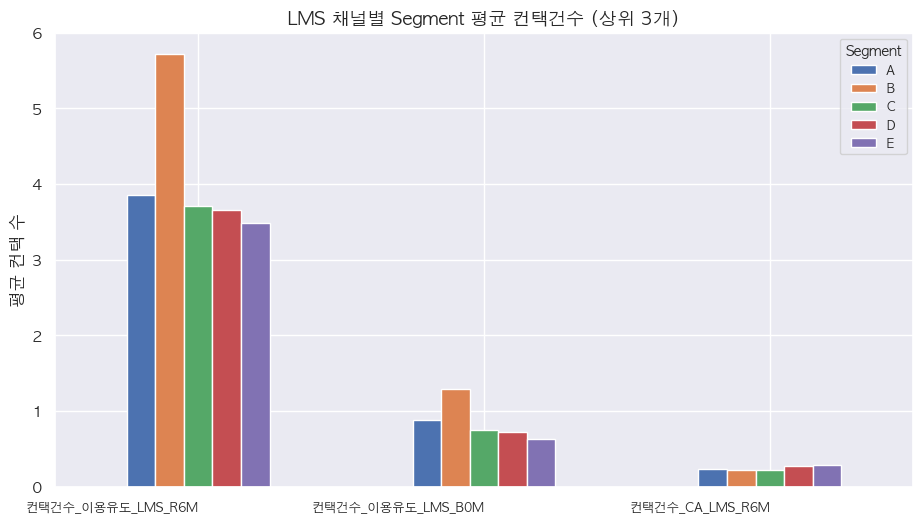

In [36]:
# 상위 3개 LMS 변수 (E 기준으로 내림차순 정렬)
top_lms_vars = segment_lms_mean.sort_values(by='E', ascending=False).head(3)
# 시각화
ax = top_lms_vars.plot(kind='bar', figsize=(10, 6))

# 제목, 축 라벨 등 설정
ax.set_title('LMS 채널별 Segment 평균 컨택건수 (상위 3개)', fontsize=13, loc='center')
ax.set_ylabel('평균 컨택 수')
# x축 텍스트 설정
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right', fontsize=9)

# 범례
plt.legend(title='Segment', fontsize=9, title_fontsize=10)
plt.grid(True)
plt.tight_layout(pad=2.5)
plt.show()


- `컨택건수_이용유도_R6M`, `컨택건수_이용유도_B0M` 모두 세그먼트 B가 가장 높음
- `컨태건수_CA_LMS_R6M`은 E가 가장 높음

TM vs LMS 비교
- TM 채널에서는 Segment E의 평균 컨택건수가 가장 높아, 주 대상 고객군으로 집중된 경향이 뚜렷하다.
- 반면 LMS 채널에서는 Segment C의 평균 컨택건수가 가장 높지만, 세그먼트 간 격차가 크지는 않아 비교적 균형적으로 분포된 것으로 보인다.


## 채권 평균컨택건수 비교(단기BOM vs 장기R6M)

In [40]:
# 1. 채권 관련 단기(B0M) 및 장기(R6M) 컬럼 추출
short_term_cols = [col for col in df.columns if '_채권_B0M' in col]
long_term_cols = [col for col in df.columns if '_채권_R6M' in col]

# 2. 전체 세그먼트 기준 평균값 계산
short_term_mean = df.groupby('Segment')[short_term_cols].mean()
long_term_mean = df.groupby('Segment')[long_term_cols].mean()

# 3. 단기/장기 컬럼 이름을 동일하게 정리 (ex: 채권_B0M → 채권)
short_term_mean.columns = [col.replace('_채권_B0M', '') for col in short_term_mean.columns]
long_term_mean.columns = [col.replace('_채권_R6M', '') for col in long_term_mean.columns]

# 4. 단기 vs 장기 평균값을 세그먼트별로 비교 (변수 기준으로 보기 위해 전치)
compare_all_segments = pd.concat([
    short_term_mean.T.rename(columns=lambda x: f'{x}_B0M'),
    long_term_mean.T.rename(columns=lambda x: f'{x}_R6M')
], axis=1)

# 5. 결과 확인
display(compare_all_segments)

Segment,A_B0M,B_B0M,C_B0M,D_B0M,E_B0M,A_R6M,B_R6M,C_R6M,D_R6M,E_R6M
컨택건수,0.005144,0.0,0.031515,0.035059,0.025806,0.316872,0.375,0.515464,0.544966,0.401212


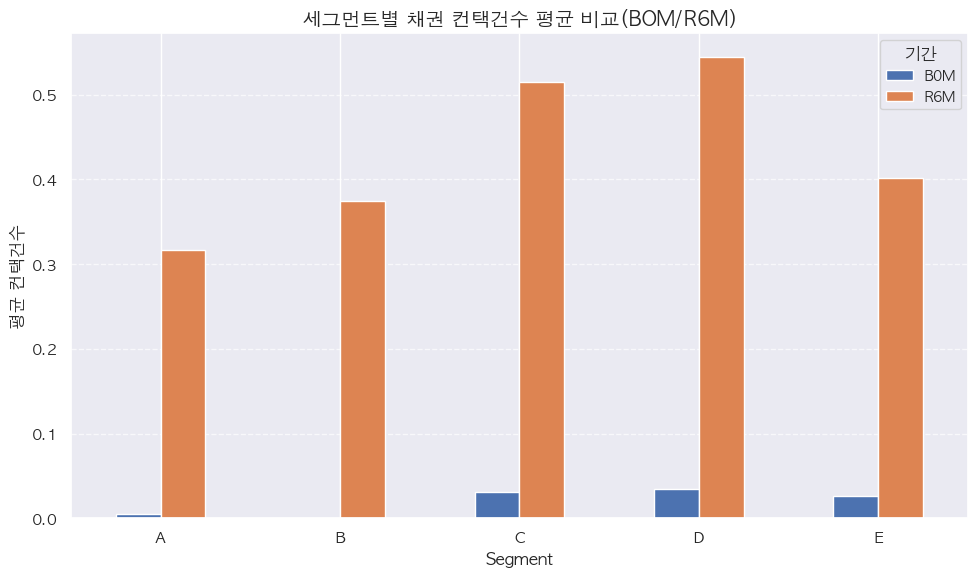

In [41]:
#시각화
# 1. 데이터 구성 (출력된 값 기반)
data = {
    'A': [0.005144, 0.316872],
    'B': [0.0, 0.375],
    'C': [0.031515, 0.515464],
    'D': [0.035059, 0.544966],
    'E': [0.025806, 0.401212]
}
df_plot = pd.DataFrame(data, index=['B0M', 'R6M']).T  # index: Segment

# 2. 시각화
df_plot.plot(kind='bar', figsize=(10, 6))

plt.title('세그먼트별 채권 컨택건수 평균 비교(BOM/R6M)', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('평균 컨택건수', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='기간', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- C, D 세그먼트는 당월 채권 컨택건수 평균이 상대적으로 높음. 최근 연체 발생 또는 리스크 관리 중일 가능성이 있음.
- 반면, A, B 세그먼트는 당월 채권 컨택건수가 매우 적거나 없어, 상환 우수 고객이거나 반대로 컨택 대상에서 제외된 고객일 수 있음.
- 컨택 데이터만으로는 상환 여부를 단정하기 어렵기 때문에 연체 정보나 고객 상태 데이터를 함께 확인할 필요가 있음.
- 최근 6개월간 채권 평균 컨택건수가 가장 높은 세그먼트는 D임 

## 당월 vs 최근 6개월 FDS(사기탐지거래) 컨택건수 비교

In [44]:
df['컨택건수_FDS_R6M'].unique()

array([0])

In [45]:
df['컨택건수_FDS_B0M'].unique()

array([0])

- 당월, 최근 6개월간 모두 FDS 컨택건수가 0인 상태

In [47]:
df.columns

Index(['기준년월', 'ID', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M',
       '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M',
       '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M',
       '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M',
       '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M',
       '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M',
       '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M',
       '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M',
       '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M',
       '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M',
       '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M',
       '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M',
       '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M',
       '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M',
       '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M

## 세그먼트별 부대서비스 TM채널 마케팅 평균 노출 건수 비교

In [49]:
df.groupby('Segment')[['컨택건수_부대서비스_TM_R6M']].mean()

,컨택건수_부대서비스_TM_R6M
Segment,
A,0.033951
B,0.152778
C,0.046383
D,0.054736
E,0.056545


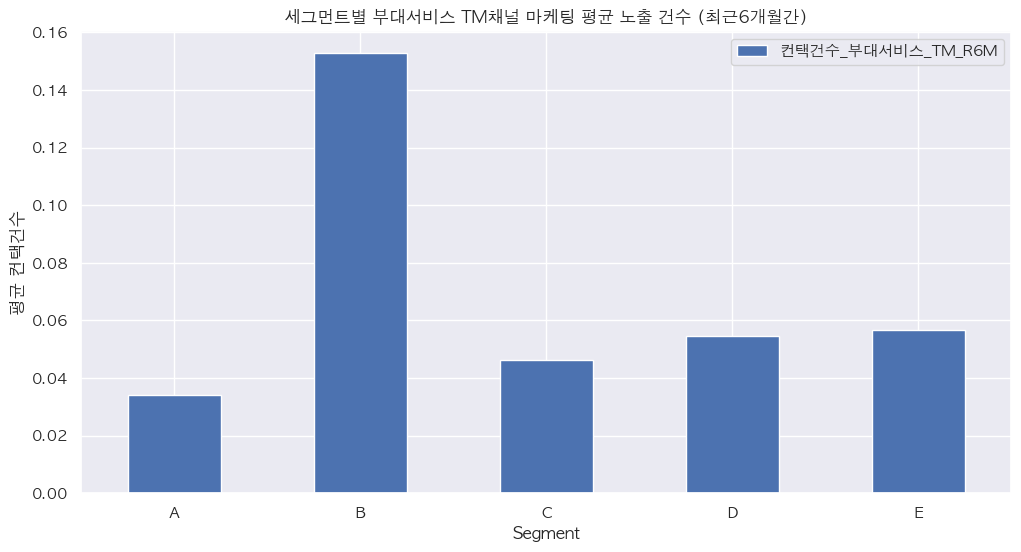

In [50]:
import matplotlib.pyplot as plt

df.groupby('Segment')[['컨택건수_부대서비스_TM_R6M']].mean().plot(kind='bar')
plt.title("세그먼트별 부대서비스 TM채널 마케팅 평균 노출 건수 (최근6개월간)")
plt.ylabel("평균 컨택건수")
plt.xticks(rotation=0)
plt.show()


- 분석 결과, 세그먼트 B는 최근 6개월간 부대서비스 마케팅 컨택 건수가 가장 높음
- 세그먼트 B는 부가서비스 혜택에 민감하거나 타겟 마케팅 우선 순위에 포함된 집단일 가능성을 시사함. 
- 세그먼트 A, C, D, E는 상대적으로 낮은 컨택 평균을 보이며, 상품 유형이나 채널 전략을 달리 가져갈 필요가 있음

## 세그먼트별 캠페인 접촉건수/접촉일수 평균 비교 (R12M)

In [53]:
df['캠페인접촉건수_R12M'].unique()

array(['1회 이상', '15회 이상', '10회 이상', '5회 이상', '20회 이상', '25회 이상'],
      dtype=object)

In [54]:
df['캠페인접촉일수_R12M'].unique()

array(['1일 이상', '10일 이상', '5일 이상', '15일 이상', '20일 이상'], dtype=object)

In [55]:
# 문자열이기 때문에 문자열에서 숫자만 뽑아준다.
df['캠페인접촉건수_R12M'] = df['캠페인접촉건수_R12M'].astype(str).str.extract('(\d+)').astype(float)  #수치형데이터로 변환
df['캠페인접촉일수_R12M'] = df['캠페인접촉일수_R12M'].astype(str).str.extract('(\d+)').astype(float)

In [56]:
df.groupby('Segment')[['캠페인접촉건수_R12M', '캠페인접촉일수_R12M']].mean()

,캠페인접촉건수_R12M,캠페인접촉일수_R12M
Segment,,
A,2.519547,2.389918
B,2.972222,2.673611
C,2.896755,2.685069
D,3.194284,2.958513
E,3.265033,3.036721


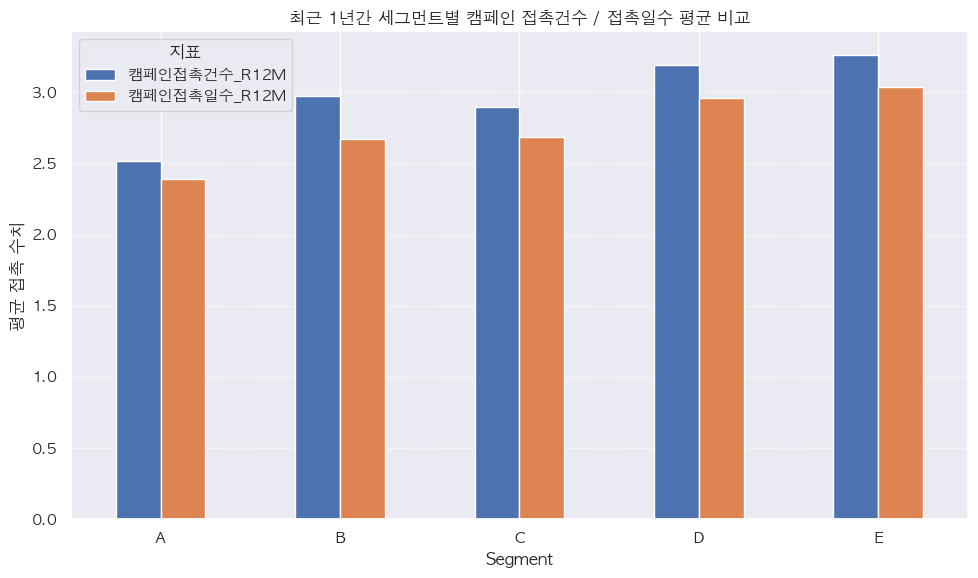

In [57]:
campaign_mean = df.groupby('Segment')[['캠페인접촉건수_R12M', '캠페인접촉일수_R12M']].mean()
campaign_mean.plot(kind='bar', figsize=(10, 6))
plt.title('최근 1년간 세그먼트별 캠페인 접촉건수 / 접촉일수 평균 비교')
plt.ylabel('평균 접촉 수치')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.legend(title='지표')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- 세그먼트 E는 캠페인 접촉건수와 접촉일수 모두 가장 높음 (마케팅의 핵심 타깃군일 가능성이 큼)
- 세그먼트 D는 E에 이어 두 번째로 높은 접촉 수준을 보임 
- 세그먼트 A는 두 지표 모두 가장 낮음 → 현재 마케팅에서 비주요 타깃으로 분류되었을 가능성 높음

## 세그먼트별 보험 TM채널 마케팅 노출 건수 비교(당월 vs 최근 6개월)

In [60]:
[col for col in df.columns if '보험' in col]

['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M']

In [61]:
df.groupby('Segment')[['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M']].mean()

,컨택건수_보험_TM_B0M,컨택건수_보험_TM_R6M
Segment,,
A,0.013374,0.431070
B,0.048611,0.645833
C,0.013073,0.435199
D,0.013174,0.447870
E,0.013167,0.516140


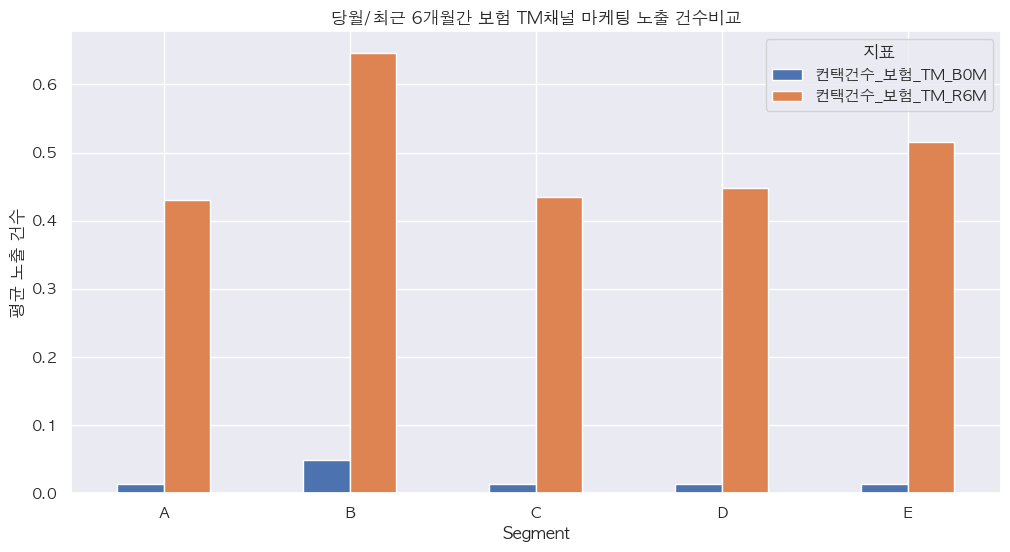

In [62]:
insurance_mean = df.groupby('Segment')[['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M']].mean()
insurance_mean.plot(kind='bar')  
plt.title('당월/최근 6개월간 보험 TM채널 마케팅 노출 건수비교')
plt.ylabel('평균 노출 건수')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.legend(title='지표')
plt.show()

- 최근 1개월간, 그리고 최근 6개월 동안 세그먼트 B는 보험 마케팅 노출 건수가 가장 높음, 세그먼트 B는 보험 마케팅의 핵심 타깃일 가능성이 높음
- 최근 6개월간 세그먼트 E의 보험 마케팅 노출 건수가 두 번째로 높음 

## 세그먼트별 카드론 채널별 마케팅 평균 노출 건수(당월 vs 최근 6개월) 

In [65]:
card_loan = ['컨택건수_카드론_TM_B0M',
 '컨택건수_카드론_LMS_B0M',
 '컨택건수_카드론_EM_B0M',
 '컨택건수_카드론_청구서_B0M',
 '컨택건수_카드론_인터넷_B0M',
 '컨택건수_카드론_당사앱_B0M',
 '컨택건수_카드론_TM_R6M',
 '컨택건수_카드론_LMS_R6M',
 '컨택건수_카드론_EM_R6M',
 '컨택건수_카드론_청구서_R6M',
 '컨택건수_카드론_인터넷_R6M',
 '컨택건수_카드론_당사앱_R6M']

In [66]:
df.groupby('Segment')[card_loan].mean()

,컨택건수_카드론_TM_B0M,컨택건수_카드론_LMS_B0M,컨택건수_카드론_EM_B0M,컨택건수_카드론_청구서_B0M,컨택건수_카드론_인터넷_B0M,컨택건수_카드론_당사앱_B0M,컨택건수_카드론_TM_R6M,컨택건수_카드론_LMS_R6M,컨택건수_카드론_EM_R6M,컨택건수_카드론_청구서_R6M,컨택건수_카드론_인터넷_R6M,컨택건수_카드론_당사앱_R6M
Segment,,,,,,,,,,,,
A,0.066872,0.000000,0.003086,0.000000,0.0,0.0,1.226337,0.030864,0.027778,0.104938,0.0,0.0
B,0.125000,0.000000,0.000000,0.000000,0.0,0.0,1.583333,0.097222,0.055556,0.125000,0.0,0.0
C,0.139925,0.003652,0.000125,0.000031,0.0,0.0,1.505040,0.062387,0.016208,0.092586,0.0,0.0
D,0.168903,0.007556,0.000117,0.000020,0.0,0.0,1.748120,0.086882,0.016401,0.100916,0.0,0.0
E,0.166960,0.003491,0.000042,0.000028,0.0,0.0,1.874827,0.094788,0.011837,0.092223,0.0,0.0


In [67]:
cardloan_mean = df.groupby('Segment')[card_loan].mean()
#컬럼이 0인 것들은 제거하기
cardloan_mean.drop(['컨택건수_카드론_인터넷_B0M','컨택건수_카드론_당사앱_B0M','컨택건수_카드론_인터넷_R6M','컨택건수_카드론_당사앱_R6M'], axis=1)

,컨택건수_카드론_TM_B0M,컨택건수_카드론_LMS_B0M,컨택건수_카드론_EM_B0M,컨택건수_카드론_청구서_B0M,컨택건수_카드론_TM_R6M,컨택건수_카드론_LMS_R6M,컨택건수_카드론_EM_R6M,컨택건수_카드론_청구서_R6M
Segment,,,,,,,,
A,0.066872,0.000000,0.003086,0.000000,1.226337,0.030864,0.027778,0.104938
B,0.125000,0.000000,0.000000,0.000000,1.583333,0.097222,0.055556,0.125000
C,0.139925,0.003652,0.000125,0.000031,1.505040,0.062387,0.016208,0.092586
D,0.168903,0.007556,0.000117,0.000020,1.748120,0.086882,0.016401,0.100916
E,0.166960,0.003491,0.000042,0.000028,1.874827,0.094788,0.011837,0.092223


In [68]:
short_cols = [col for col in cardloan_mean.columns if '_B0M' in col]
long_cols  = [col for col in cardloan_mean.columns if '_R6M' in col]

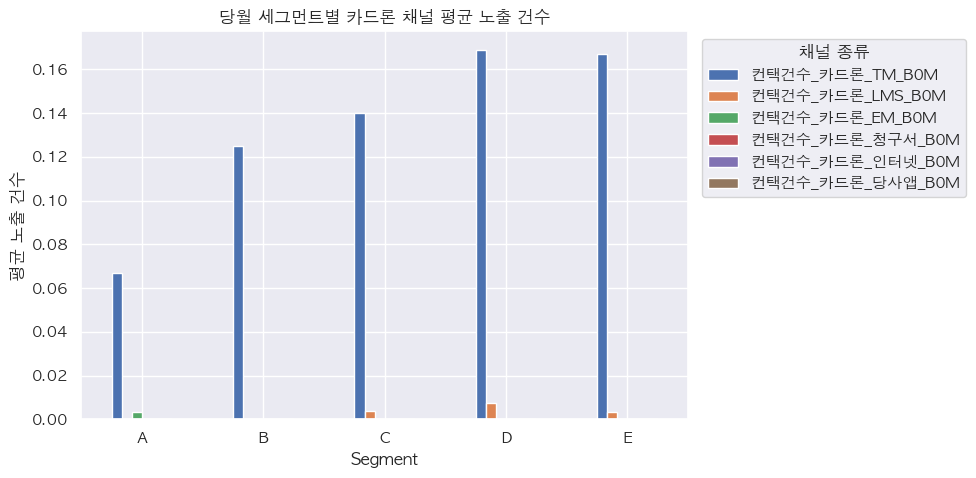

In [69]:
cardloan_mean[short_cols].plot(kind='bar', figsize=(10,5))
plt.title('당월 세그먼트별 카드론 채널 평균 노출 건수')
plt.ylabel('평균 노출 건수')
plt.xticks(rotation=0)
plt.legend(title='채널 종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

- 당월 카드론의 경우 모든 세그먼트에 한해 TM 채널 마케팅 평균 노출 건수가 독보적으로 높음
- 당월 인터넷, 당사앱 채널을 통한 카드론은 수치가 너무 낮아 그래프에서 거의 보이지 않을 정도  (+ 이 문제를 어떻게 해결해야할지?)

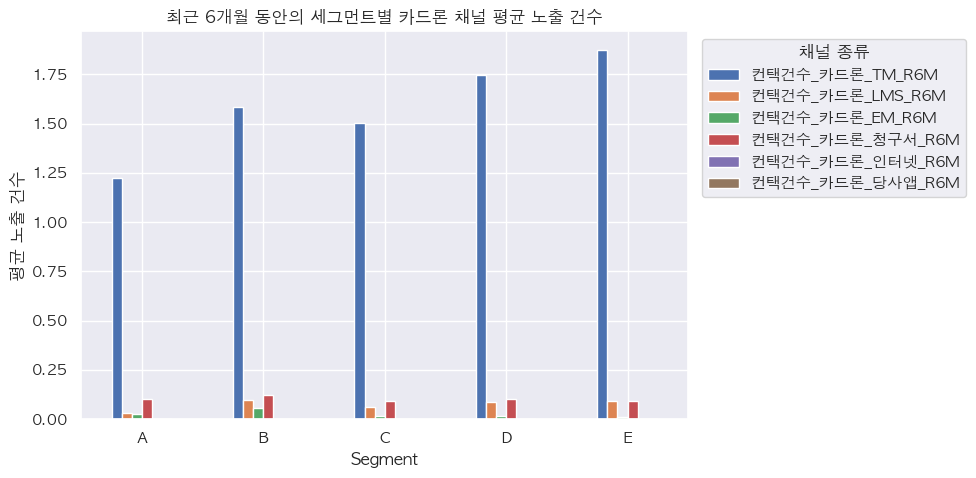

In [71]:
cardloan_mean[long_cols].plot(kind='bar', figsize=(10,5))
plt.title('최근 6개월 동안의 세그먼트별 카드론 채널 평균 노출 건수')
plt.ylabel('평균 노출 건수')
plt.xticks(rotation=0)
plt.legend(title='채널 종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


- 최근 6개월간 카드론의 경우 모든 세그먼트에 한해 TM 채널 마케팅 평균 노출 건수가 독보적으로 높음
- 최근 6개월간 세그먼트 E의 카드론 채널 평균 노출 건수가 가장 높음 
- 카드론 마케팅이 TM 채널에 과도하게 집중되어 있음을 시사, 다른 채널 활용은 매우 제한적인 상태

## 세그먼트별 CA(현금서비스) 채널별 마케팅 평균 노출 건수(당월 vs 최근 6개월) 

In [74]:
[col for col in df.columns if 'CA' in col]

['컨택건수_CA_TM_B0M',
 '컨택건수_CA_LMS_B0M',
 '컨택건수_CA_EM_B0M',
 '컨택건수_CA_청구서_B0M',
 '컨택건수_CA_인터넷_B0M',
 '컨택건수_CA_당사앱_B0M',
 '컨택건수_CA_TM_R6M',
 '컨택건수_CA_LMS_R6M',
 '컨택건수_CA_EM_R6M',
 '컨택건수_CA_청구서_R6M',
 '컨택건수_CA_인터넷_R6M',
 '컨택건수_CA_당사앱_R6M']

In [75]:
ca_marketing =['컨택건수_CA_TM_B0M',
 '컨택건수_CA_LMS_B0M',
 '컨택건수_CA_EM_B0M',
 '컨택건수_CA_청구서_B0M',
 '컨택건수_CA_인터넷_B0M',
 '컨택건수_CA_당사앱_B0M',
 '컨택건수_CA_TM_R6M',
 '컨택건수_CA_LMS_R6M',
 '컨택건수_CA_EM_R6M',
 '컨택건수_CA_청구서_R6M',
 '컨택건수_CA_인터넷_R6M',
 '컨택건수_CA_당사앱_R6M']

In [76]:
ca_mean =df.groupby('Segment')[ca_marketing].mean()
ca_mean

,컨택건수_CA_TM_B0M,컨택건수_CA_LMS_B0M,컨택건수_CA_EM_B0M,컨택건수_CA_청구서_B0M,컨택건수_CA_인터넷_B0M,컨택건수_CA_당사앱_B0M,컨택건수_CA_TM_R6M,컨택건수_CA_LMS_R6M,컨택건수_CA_EM_R6M,컨택건수_CA_청구서_R6M,컨택건수_CA_인터넷_R6M,컨택건수_CA_당사앱_R6M
Segment,,,,,,,,,,,,
A,0.0,0.000000,0.0,0.010288,0.0,0.0,0.004115,0.240741,0.0,0.246914,0.0,0.0
B,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.222222,0.0,0.208333,0.0,0.0
C,0.0,0.000016,0.0,0.005800,0.0,0.0,0.001685,0.219962,0.0,0.218763,0.0,0.0
D,0.0,0.000037,0.0,0.007622,0.0,0.0,0.001609,0.277249,0.0,0.237005,0.0,0.0
E,0.0,0.000011,0.0,0.003885,0.0,0.0,0.001053,0.282035,0.0,0.195934,0.0,0.0


In [77]:
#컬럼이 0인 것들은 제거하기 

In [78]:
ca_mean.drop(['컨택건수_CA_TM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_CA_인터넷_B0M', 
              '컨택건수_CA_당사앱_B0M', '컨택건수_CA_EM_R6M', '컨택건수_CA_인터넷_R6M', '컨택건수_CA_당사앱_R6M'], axis=1)   

,컨택건수_CA_LMS_B0M,컨택건수_CA_청구서_B0M,컨택건수_CA_TM_R6M,컨택건수_CA_LMS_R6M,컨택건수_CA_청구서_R6M
Segment,,,,,
A,0.000000,0.010288,0.004115,0.240741,0.246914
B,0.000000,0.000000,0.000000,0.222222,0.208333
C,0.000016,0.005800,0.001685,0.219962,0.218763
D,0.000037,0.007622,0.001609,0.277249,0.237005
E,0.000011,0.003885,0.001053,0.282035,0.195934


In [79]:
short_cols = [col for col in ca_mean.columns if '_B0M' in col]
long_cols  = [col for col in ca_mean.columns if '_R6M' in col]

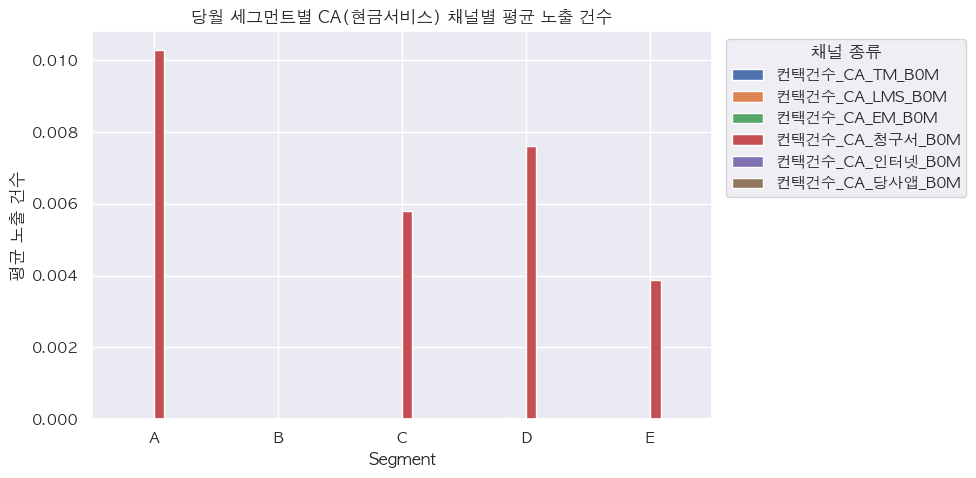

In [80]:
ca_mean[short_cols].plot(kind='bar', figsize=(10,5))
plt.title('당월 세그먼트별 CA(현금서비스) 채널별 평균 노출 건수')
plt.ylabel('평균 노출 건수')
plt.xticks(rotation=0)
plt.legend(title='채널 종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


- 당월 CA(현금서비스)는 청구서를 통한 평균 노출 건수가 가장 높으며, 다른 채널 대비 2~3배 이상 높은 수준으로 나타남 
- 특히 세그먼트 A가 다른 세그먼트에 비해 높은 노출 빈도를 보임. 이는 A세그먼트를 현금서비스에서 주요 타겟군으로 활용하고 있음을 시사

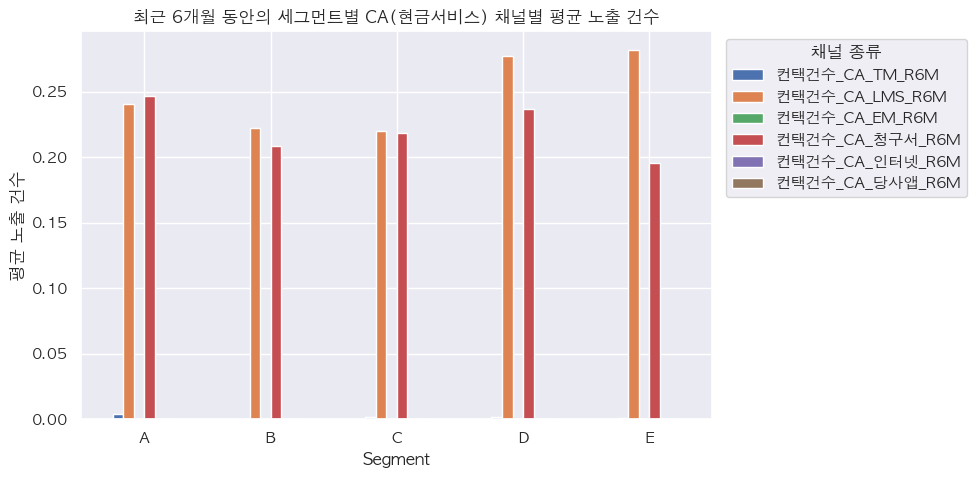

In [82]:
ca_mean[long_cols].plot(kind='bar', figsize=(10,5))
plt.title('최근 6개월 동안의 세그먼트별 CA(현금서비스) 채널별 평균 노출 건수')
plt.ylabel('평균 노출 건수')
plt.xticks(rotation=0)
plt.legend(title='채널 종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

- 최근 6개월간 CA(현금서비스) 마케팅은 전 세그먼트에서 LMS 문자 채널을 중심으로 진행되었으며, 청구서 채널이 그 다음으로 높은 노출 건수를 기록함
- CA(현금서비스) 마케팅에서 TM, 인터넷, 당사앱 등의 기타 채널은 전반적으로 매우 낮은 활용도를 보임

## 세그먼트별 리볼빙 채널별 마케팅 평균 노출 건수 (당월 vs 최근 6개월) 

In [85]:
[col for col in df.columns if '리볼빙' in col]

['컨택건수_리볼빙_TM_B0M',
 '컨택건수_리볼빙_LMS_B0M',
 '컨택건수_리볼빙_EM_B0M',
 '컨택건수_리볼빙_청구서_B0M',
 '컨택건수_리볼빙_인터넷_B0M',
 '컨택건수_리볼빙_당사앱_B0M',
 '컨택건수_리볼빙_TM_R6M',
 '컨택건수_리볼빙_LMS_R6M',
 '컨택건수_리볼빙_EM_R6M',
 '컨택건수_리볼빙_청구서_R6M',
 '컨택건수_리볼빙_인터넷_R6M',
 '컨택건수_리볼빙_당사앱_R6M']

In [86]:
revolving = ['컨택건수_리볼빙_TM_B0M',
 '컨택건수_리볼빙_LMS_B0M',
 '컨택건수_리볼빙_EM_B0M',
 '컨택건수_리볼빙_청구서_B0M',
 '컨택건수_리볼빙_인터넷_B0M',
 '컨택건수_리볼빙_당사앱_B0M',
 '컨택건수_리볼빙_TM_R6M',
 '컨택건수_리볼빙_LMS_R6M',
 '컨택건수_리볼빙_EM_R6M',
 '컨택건수_리볼빙_청구서_R6M',
 '컨택건수_리볼빙_인터넷_R6M',
 '컨택건수_리볼빙_당사앱_R6M']

In [87]:
revolving_mean = df.groupby('Segment')[revolving].mean()
revolving_mean

,컨택건수_리볼빙_TM_B0M,컨택건수_리볼빙_LMS_B0M,컨택건수_리볼빙_EM_B0M,컨택건수_리볼빙_청구서_B0M,컨택건수_리볼빙_인터넷_B0M,컨택건수_리볼빙_당사앱_B0M,컨택건수_리볼빙_TM_R6M,컨택건수_리볼빙_LMS_R6M,컨택건수_리볼빙_EM_R6M,컨택건수_리볼빙_청구서_R6M,컨택건수_리볼빙_인터넷_R6M,컨택건수_리볼빙_당사앱_R6M
Segment,,,,,,,,,,,,
A,0.000000,0.000000,0.0,0.0,0.0,0.0,0.070988,0.005144,0.0,0.0,0.0,0.0
B,0.000000,0.000000,0.0,0.0,0.0,0.0,0.069444,0.000000,0.0,0.0,0.0,0.0
C,0.000008,0.000118,0.0,0.0,0.0,0.0,0.041994,0.004240,0.0,0.0,0.0,0.0
D,0.000000,0.000023,0.0,0.0,0.0,0.0,0.047683,0.005624,0.0,0.0,0.0,0.0
E,0.000008,0.000002,0.0,0.0,0.0,0.0,0.052393,0.004276,0.0,0.0,0.0,0.0


In [88]:
#컬럼이 0인것들은 제거하기

In [89]:
revolving_mean.drop(['컨택건수_리볼빙_EM_B0M', '컨택건수_리볼빙_청구서_B0M', '컨택건수_리볼빙_인터넷_B0M', 
                    '컨택건수_리볼빙_당사앱_B0M', '컨택건수_리볼빙_EM_R6M', '컨택건수_리볼빙_청구서_R6M',
                    '컨택건수_리볼빙_인터넷_R6M',	'컨택건수_리볼빙_당사앱_R6M'], axis=1)

,컨택건수_리볼빙_TM_B0M,컨택건수_리볼빙_LMS_B0M,컨택건수_리볼빙_TM_R6M,컨택건수_리볼빙_LMS_R6M
Segment,,,,
A,0.000000,0.000000,0.070988,0.005144
B,0.000000,0.000000,0.069444,0.000000
C,0.000008,0.000118,0.041994,0.004240
D,0.000000,0.000023,0.047683,0.005624
E,0.000008,0.000002,0.052393,0.004276


In [90]:
short_cols = ['컨택건수_리볼빙_TM_B0M','컨택건수_리볼빙_LMS_B0M']
long_cols = ['컨택건수_리볼빙_TM_R6M','컨택건수_리볼빙_LMS_R6M']

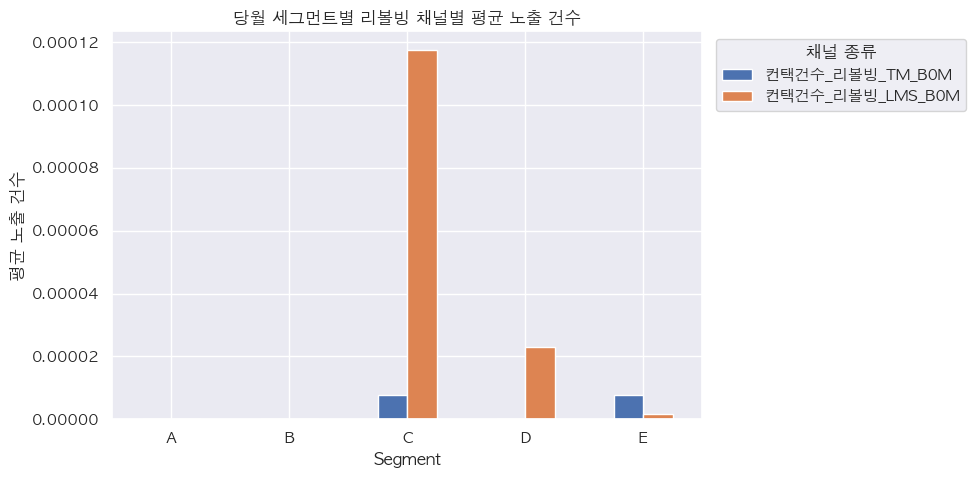

In [91]:
#시각화
revolving_mean[short_cols].plot(kind='bar', figsize=(10,5))
plt.title('당월 세그먼트별 리볼빙 채널별 평균 노출 건수')
plt.ylabel('평균 노출 건수')
plt.xticks(rotation=0)
plt.legend(title='채널 종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


- 당월 세그먼트 C에서 LMS채널을 통한 리볼빙 노출 건수가 압도적으로 높음
- 세그먼트 D 또한 C 다음으로 주목되는 대상군, LMS 채널이 리볼빙 마케팅의 핵심 채널로 사용되고 있음을 보여줌
- 세그먼트 A,B는 리볼빙 마케팅 노출이 거의 없음
- 전반적으로 리볼빙 마케팅은 LMS 채널 의존도가 높음

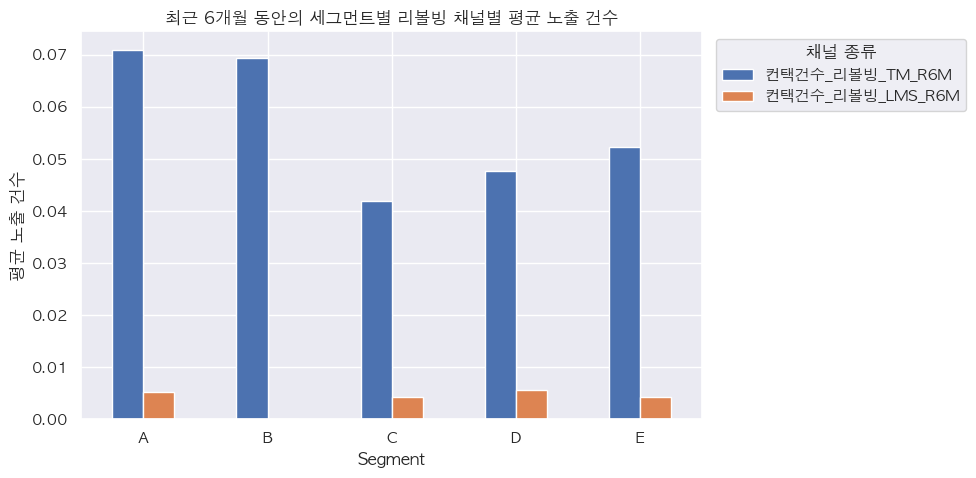

In [93]:
#시각화
revolving_mean[long_cols].plot(kind='bar', figsize=(10,5))
plt.title('최근 6개월 동안의 세그먼트별 리볼빙 채널별 평균 노출 건수')
plt.ylabel('평균 노출 건수')
plt.xticks(rotation=0)
plt.legend(title='채널 종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

- 최근 6개월간 모든 세그먼트에서 TM 채널의 평균 노출 건수가 LMS 문자보다 압도적으로 높게 나타남
- 특히 세그먼트 A, B에서 리볼빙 상품에 대한 평균 노출 건수가 가장 활발하게 이루어짐

## 총정리

| 세그먼트  | 고객 비중     | 채권 컨택 (당월) | 채권 컨택 (6개월) | 보험 마케팅     | 카드론 마케팅              | 현금서비스            | 리볼빙              | 캠페인 접촉            | 부대서비스     |
| ----- | --------- | ---------- | ----------- | ---------- | -------------------- | ---------------- | ---------------- | ----------------- | --------- |
| **A** | 매우 적음     | 매우 낮음      | 낮음          | 매우 낮음      | TM 채널만 약간            | **CA 청구서 매우 높음** | **거의 없음**        | **접촉건수·일수 모두 낮음** | 낮음        |
| **B** | 적음        | 매우 낮음      | 낮음          | **가장 높음**  | TM만 노출               | 낮음               | 거의 없음            | 낮음                | **가장 높음** |
| **C** | 중간        | **높음**     | 낮음          | 중간         | TM 한정 노출             | 낮음               | **LMS 당월 매우 높음** | 중간                | 낮음        |
| **D** | 중간        | **높음**     | **가장 높음**   | 중간         | TM 노출                | 낮음               | **LMS 당월 높음**    | **E 다음으로 높음**     | 낮음        |
| **E** | **가장 많음** | 낮음         | 중간          | **2위로 높음** | **카드론 TM 최근 6개월 최고** | 낮음               | 최근 TM 6개월간 노출 활발 | **접촉건수·일수 최고**    | 낮음        |


### 피처 선택 요약표 (세그먼트 분류용)

| **카테고리**      | **추천 피처명 예시**               | **선택 이유 (정보력)**                                       |
| ------------- | --------------------------- | ----------------------------------------------------- |
| **채권 컨택**     | `채권컨택_B0M`, `채권컨택_R6M`      | A: 매우 낮음 / C·D: 높음 → 상환 리스크 성향 잘 반영 (구분력 강함)          |
| **보험 마케팅**    | `보험_TM_B0M`, `보험_TM_R6M`    | B가 가장 높고, A는 낮음 → 마케팅 반응 차이를 통해 고객 특성 파악 가능           |
| **카드론 마케팅**   | `카드론_TM_B0M`, `카드론_TM_R6M`  | E가 6개월간 가장 활발, A는 거의 없음 → 타깃 여부에 따른 분류 지표             |
| **현금서비스 채널**  | `CA_청구서_B0M`, `CA_LMS_R6M`  | A가 청구서 중심으로 매우 높음, 나머지는 낮음 → 세그먼트별 접근 채널 차이 반영        |
| **리볼빙 마케팅**   | `리볼빙_LMS_B0M`, `리볼빙_TM_R6M` | C·D는 LMS 채널에서 활발, A·B는 거의 없음 → 금융상품 반응 차이로 세그먼트 구분 가능 |
| **캠페인 접촉**    | `캠페인_접촉건수`, `캠페인_접촉일수`      | E: 가장 활발 / A: 거의 없음 → 마케팅 중요도 및 관리 수준을 반영             |
| **부대서비스 노출**  | `부대_TM_R6M`                 | B만 유독 높음, A·C·D·E는 낮음 → 특정 세그먼트 특이성 판단 가능             |
| **FDS 관련 피처** | ❌ `FDS_B0M`, `FDS_R6M` 제외   | 모든 값이 0 → 의미 없음, 분석 제외 처리                             |


### +) 인사이트 모음

#### 세그먼트 분포
- Segment 수 E > D > C 
- E가 압도적으로 많음
- 클래스 간 불균형이 심함

#### 세그먼트별 채권 컨택건수 평균 비교
- C, D 세그먼트는 당월 채권 컨택건수 평균이 상대적으로 높음. 최근 연체 발생 또는 리스크 관리 중일 가능성이 있음.
- 반면, A, B 세그먼트는 당월 채권 컨택건수가 매우 적거나 없어, 상환 우수 고객이거나 반대로 컨택 대상에서 제외된 고객일 수 있음.
- 컨택 데이터만으로는 상환 여부를 단정하기 어렵기 때문에 연체 정보나 고객 상태 데이터를 함께 확인할 필요가 있음.
- 최근 6개월간 채권 평균 컨택건수가 가장 높은 세그먼트는 D임 

#### FDS 컨택건수 비교
- 6개월간 모두 FDS 컨택건수가 0인 상태


#### 세그먼트별 부대서비스 TM채널 마케팅 평균 노출 건수
- 분석 결과, 세그먼트 B는 최근 6개월간 부대서비스 마케팅 컨택 건수가 가장 높음
- 세그먼트 B는 부가서비스 혜택에 민감하거나 타겟 마케팅 우선 순위에 포함된 집단일 가능성을 시사함. 
- 세그먼트 A, C, D, E는 상대적으로 낮은 컨택 평균을 보이며, 상품 유형이나 채널 전략을 달리 가져갈 필요가 있음


#### 세그먼트별 캠페인 접촉건수/접촉일수 평균 비교 (최근 1년간)
- 세그먼트 E는 캠페인 접촉건수와 접촉일수 모두 가장 높음 (마케팅의 핵심 타깃군일 가능성이 큼)
- 세그먼트 D는 E에 이어 두 번째로 높은 접촉 수준을 보임 
- 세그먼트 A는 두 지표 모두 가장 낮음 → 현재 마케팅에서 비주요 타깃으로 분류되었을 가능성 높음


#### 세그먼트별 보험 TM채널 마케팅 노출건수 비교(당월vs최근 6개월)
- 당월, 그리고 최근 6개월 동안 세그먼트 B는 보험 마케팅 노출 건수가 가장 높음, 세그먼트 B는 보험 마케팅의 핵심 타깃일 가능성이 높음
- 최근 6개월간 세그먼트 E의 보험 마케팅 노출 건수가 두 번째로 높음 

#### 세그먼트별 카드론 채널별 마케팅 평균 노출건수 (당월vs최근 6개월)
- 당월 카드론의 경우 모든 세그먼트에 한해 TM 채널 마케팅 평균 노출 건수가 독보적으로 높음
- 당월 인터넷, 당사앱 채널을 통한 카드론은 수치가 너무 낮아 그래프에서 거의 보이지 않을 정도  (+ 이 문제를 어떻게 해결해야할지?)
- 최근 6개월간 카드론의 경우 모든 세그먼트에 한해 TM 채널 마케팅 평균 노출 건수가 독보적으로 높음
- 최근 6개월간 세그먼트 E의 카드론 채널 평균 노출 건수가 가장 높음 ,카드론 마케팅이 TM 채널에 과도하게 집중되어 있음을 시사, 다른 채널 활용은 매우 제한적인 상태


#### 세그먼트별 현금서비스 채널별 마케팅 평균 노출 건수 
- 당월 CA(현금서비스)는 청구서를 통한 평균 노출 건수가 가장 높으며, 다른 채널 대비 2~3배 이상 높은 수준으로 나타남 
- 특히 세그먼트 A가 다른 세그먼트에 비해 높은 노출 빈도를 보임. 이는 A세그먼트를 현금서비스에서 주요 타겟군으로 활용하고 있음을 시사
- 최근 6개월간 CA(현금서비스) 마케팅은 전 세그먼트에서 LMS 문자 채널을 중심으로 진행되었으며, 청구서 채널이 그 다음으로 높은 노출 건수를 기록함

#### 세그먼트별 리볼빙 채널별 마케팅 평균 노출 건수 (당월 vs 최근 6개월)
- 당월 세그먼트 C에서 LMS채널을 통한 리볼빙 노출 건수가 압도적으로 높음
- 세그먼트 D 또한 C 다음으로 주목되는 대상군, LMS 채널이 리볼빙 마케팅의 핵심 채널로 사용되고 있음을 보여줌
- 세그먼트 A,B는 리볼빙 마케팅 노출이 거의 없음
- 전반적으로 리볼빙 마케팅은 LMS 채널 의존도가 높음
- 최근 6개월간 모든 세그먼트에서 TM 채널의 평균 노출 건수가 LMS 문자보다 압도적으로 높게 나타남, 특히 세그먼트 A, B에서 리볼빙 상품에 대한 평균 노출 건수가 가장 활발하게 이루어짐

In [ ]:
당월: 데이터가 수집된 기준 / 조금 더 명확한 설명 추가하기
월별 조건 다르다